# CI280 - Final Project - Part B
#
# Data Preparation, Sort, Groupby and Plot( 100 pts)

## Name


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 8))

In [3]:
df = pd.read_csv('data//covid-data.csv')

In [5]:
# limiting the display rows
pd.set_option('display.max_rows', 5)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df[ (df['location'] != 'World') ]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Show number of records 
import random
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')

You name , id:  9834
------------------------------


## C) Handing Missing Data and Ploting (20 pts)

### use isnull() vs. notnull()
### use dropna
### use replacena

In [4]:
# show last five rows
df.tail()     

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56316,NaN,NaN,International,2020-11-08,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56317,NaN,NaN,International,2020-11-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56318,NaN,NaN,International,2020-11-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# show the number of rows and columns of datafram 
df.shape
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')

# 1) Show the number records of miss data for continent ( 2 pts)
#    Show the the last five those records 

print('The number records missing data for continent')






You name , id:  5035
------------------------------
The number records missing data for continent
313


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
59916,NaN,NaN,International,2020-11-26,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59917,NaN,NaN,International,2020-11-27,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59918,NaN,NaN,International,2020-11-28,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59919,NaN,NaN,International,2020-11-29,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59920,NaN,NaN,International,2020-11-30,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')


# 2-3) Show the number records of miss data for continent and iso_code (2 pts)
#    Show the the last five those records ( 2 pts)









You name , id:  3404
------------------------------
The number records missing data for continent and iso_code
313


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
59916,NaN,NaN,International,2020-11-26,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59917,NaN,NaN,International,2020-11-27,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59918,NaN,NaN,International,2020-11-28,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59919,NaN,NaN,International,2020-11-29,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59920,NaN,NaN,International,2020-11-30,721.0,0.0,0.0,15.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')



# 4-5) For the records for Bazil, which columns has missing data (4 pts)
res = df[df['location']=='Brazil']
res

col_names = res.columns
col_names







You name , id:  5077
------------------------------
The following columns ar missing data for Brazil
 Column Name 				Missing Data
------------------------------------------------
total_cases                              34
new_cases_smoothed                       5
total_deaths                             54
new_deaths_smoothed                      5
total_cases_per_million                  34
new_cases_smoothed_per_million           5
total_deaths_per_million                 54
new_deaths_smoothed_per_million          5
reproduction_rate                        61
icu_patients                             313
icu_patients_per_million                 313
hosp_patients                            313
hosp_patients_per_million                313
weekly_icu_admissions                    313
weekly_icu_admissions_per_million        313
weekly_hosp_admissions                   313
weekly_hosp_admissions_per_million       313
total_tests                              297
new_tests              

In [30]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')


#df.columns

df.shape
# .dropna() vs. . dropna(how='all')

# 6) Show the result after droping rows which have at least one NaN data in the dataset ()  (2 pts)









You name , id:  581
------------------------------
After using .dropn(), total records: 
0


In [32]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')

# 7) Show the result after after droping rows which all data is NaN in the dataset ()  (2 pts)








You name , id:  7887
------------------------------
After using .dropna(how='all'), total records:
59607


In [8]:

number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')

print(df.shape)
print('Original row number:', len(df))

# 8) Show the result after dropping the rows which continent or iso data is missing in the dataset
#    How many rows are dropped. (2 pts)








You name , id:  8106
------------------------------
(56003, 49)
Original row number: 56003
After droping all missing data of continent or iso in the dataset
New dataset included record number: 55685
The number of rows dropped: 318


In [16]:
res = df[df['location']=='Brazil']
res[['location','handwashing_facilities']]

,location,handwashing_facilities
7202,Brazil,NaN
7203,Brazil,NaN
...,...,...
7518,Brazil,NaN
7519,Brazil,NaN


In [14]:

# 9) Show Brazil's handwashing_facilities information
#    Show the average of handwashing_facilities of worldwide level

import random
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')

#print(df['handwashing_facilities'].describe())


print("Handwashing_facilities values are missing in Brazil")
res = df[df['location']=='Brazil']
print(len(res))









You name , id:  5663
------------------------------
Handwashing_facilities values are missing in Brazil
318
     location        date  handwashing_facilities
7202   Brazil  2019-12-31                     NaN
7203   Brazil  2020-01-01                     NaN
...       ...         ...                     ...
7518   Brazil  2020-11-11                     NaN
7519   Brazil  2020-11-12                     NaN

[318 rows x 3 columns]

---------------------------------------------------------------------
The average of handwashing_facilities of worldwide is: 52


In [16]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')

import math

# 10) Replace handwashing_facilities in Brazil as the average of worldwide level (2 pts)









You name , id:  314
------------------------------
Now handwashing_facilities values are replace by the average of worldwide level


,location,date,handwashing_facilities
7202,Brazil,2019-12-31,52.0
7203,Brazil,2020-01-01,52.0
...,...,...,...
7518,Brazil,2020-11-11,52.0
7519,Brazil,2020-11-12,52.0


# D) Sorting, Grouping and Plotting (30 points) 

## df.sort_values(by=['a','b'], ascending = True)
## df.sort_index()
## df.groupby( )

In [10]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')
import matplotlib.pyplot as plt

# 1)  (3 pts) Find the top 10 countries which have the most covid cases

# Group all cases by location , become series
cases = df.groupby(df.location).new_cases.sum()
cases = cases.sort_values(ascending = False)
cases












You name , id:  8380
------------------------------
10 countries which have the most covid cases
Country              covid cases
------------------------------------------------
United States        	 13541220
India                	 9462809
Brazil               	 6335878
Russia               	 2275936
France               	 2275016
Spain                	 1648187
United Kingdom       	 1633733
Italy                	 1601554
Argentina            	 1424533
Colombia             	 1316806


You name , id:  2406
------------------------------
Index(['United States', 'India', 'Brazil', 'Russia', 'France', 'Spain',
       'United Kingdom', 'Italy', 'Argentina', 'Colombia'],
      dtype='object', name='location')
[13541220.  9462809.  6335878.  2275936.  2275016.  1648187.  1633733.
  1601554.  1424533.  1316806.]


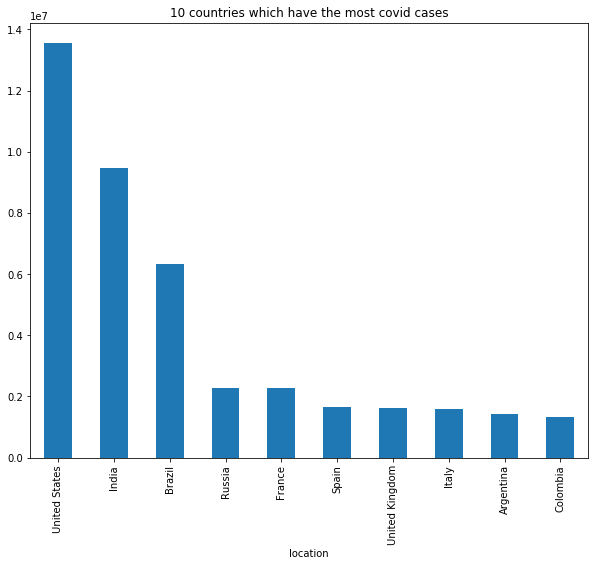

In [13]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')


# 2) Use bar chart to show the top 10 countries which have the most covid cases. (3 pts)








You name , id:  8832
------------------------------
Ten days which have the most covid cases
Date              covid cases
------------------------------------------------
2020-11-06 	 641953
2020-11-11 	 644986
2020-11-12 	 647297
2020-11-13 	 648785
2020-11-17 	 608102
2020-11-18 	 623670
2020-11-19 	 650567
2020-11-20 	 666146
2020-11-25 	 632945
2020-11-27 	 671885


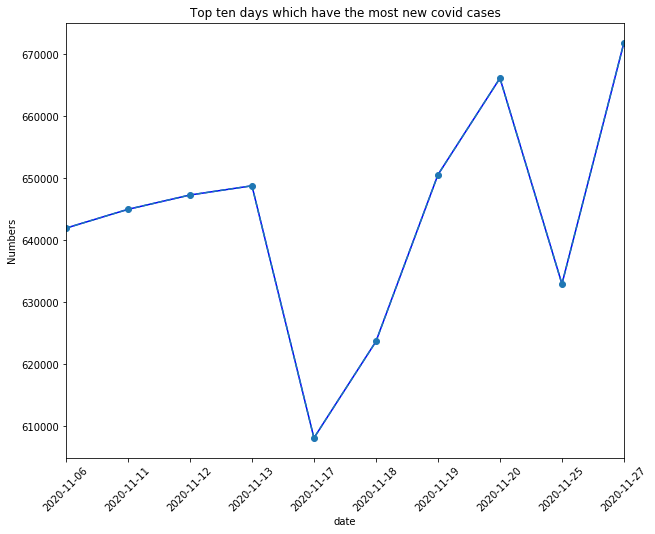

In [15]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')

# (3  pts)

# 3) Show worldwide, which ten day has the most new cases? 

#    Use line chart to show the top 10 days which have the most new covid cases 


    
    
# Draw bar chart






You name , id:  4186
------------------------------
On 2020-11-30
10 countries which have the most covid cases on 2020-11-30
Country              covid cases
------------------------------------------------
United States        	 157901
Turkey               	 31219
India                	 31118
Russia               	 26046
Brazil               	 21138
Spain                	 19979
Italy                	 16376
Germany              	 14221
Iran                 	 13321
United Kingdom       	 12428


<BarContainer object of 10 artists>

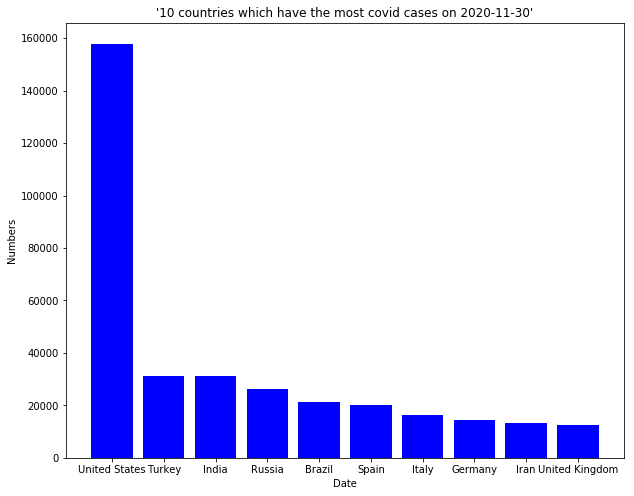

In [21]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')

# (3  pts)

# 4) On 2020-11-30, which ten countries has the most new cases? 

#    Use bar chart to show the top 10 location which have the most new covid cases 





# Draw bar chart




You name , id:  926
------------------------------

In the past seven days, the new cases in Brazil
Date             covid cases
------------------------------------------
2020-11-24 	 31100
2020-11-25 	 47898
2020-11-26 	 37614
2020-11-27 	 34130
2020-11-28 	 51922
2020-11-29 	 24468
2020-11-30 	 21138


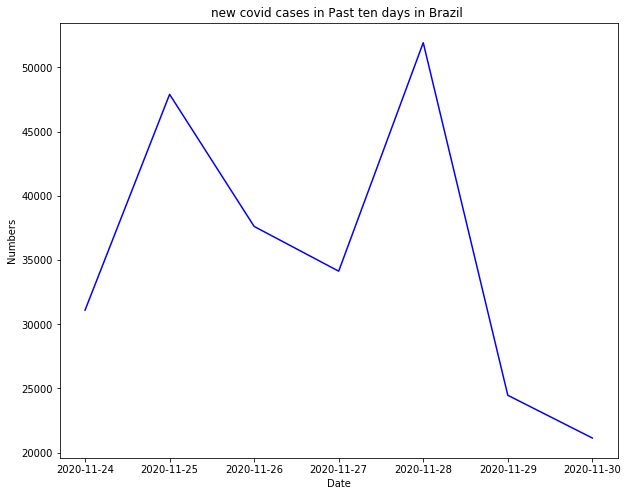

In [27]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')

# (3  pts)


#  5)  Show last seven days, the new cases in Brazil/US/India/Russia (Chose one country),
#      Plot a line chart












Total covid new cases by Continent
Europe               	 17342381
Asia                 	 16748512
North America        	 15809570
South America        	 11130276
Africa               	 2174098
Oceania              	 30691


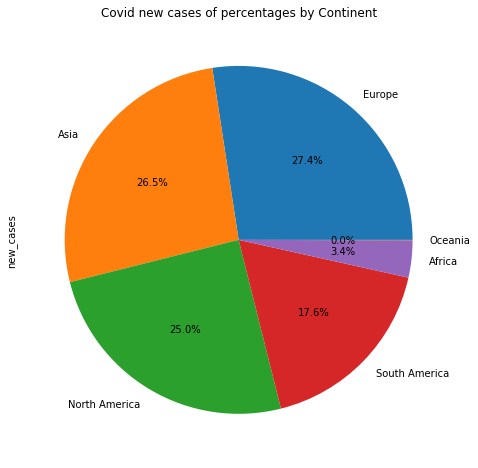

In [89]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')


# 6-7) Group by contient, show total of new covid cases for each contient and sorted by total number
#    Plot the result by pie chart (3 pts)















In [33]:

res

,location,population
10332,China,1.439324e+09
24490,India,1.380004e+09
...,...,...
56476,Vatican,8.090000e+02
59920,International,NaN


You name , id:  756
------------------------------
Top 10 counties which have the most POPULATION
China                1439323774
India                1380004385
United States        331002647
Indonesia            273523621
Pakistan             220892331
Brazil               212559409
Nigeria              206139587
Bangladesh           164689383
Russia               145934460
Mexico               128932753


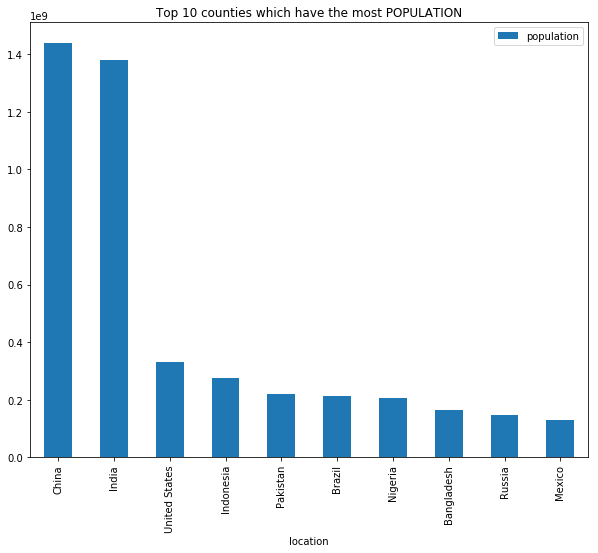

In [45]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')

# 8) Show the top 10 countries which have the most population  (3 pts)















You name , id:  7528
------------------------------
the world poplation 7746825445.0
population by Continent
-----------------------------------
Asia                 	 1444009233992
Africa               	 419458779069
Europe               	 234262937267
North America        	 187106204973
South America        	 134733230991
Oceania              	 12906308824


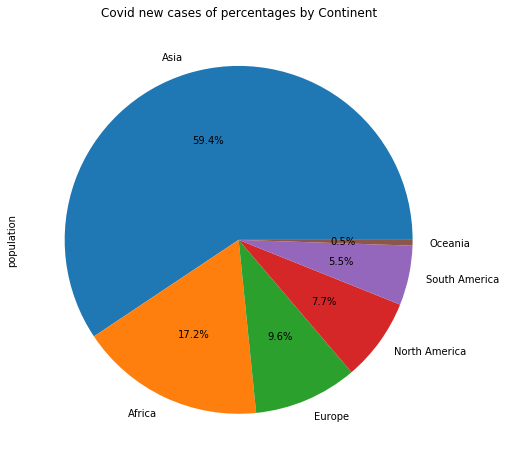

In [46]:
number = random.randint(0,10000)
print("You name , id: ", number )
print('------------------------------')

# 9-10) Show the world poplation
#      Show the  population by each continent and show it as pie chart (6 pts)
data = df[df.date=='2020-11-30']




